Problem statement : Identify Human eye from image if it is male or female eye.

In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import glob,shutil,random

In [2]:
os.chdir("C:/Users/Com/Downloads/Compressed/Eyes Data Set/")
if os.path.isdir("train/female") is False:
    os.makedirs("train/female")
    os.makedirs("train/male")
    os.makedirs("val/female")
    os.makedirs("val/male")
    os.makedirs("test/female")
    os.makedirs("test/male")

In [25]:
source = "C:/Users/Com/Downloads/Compressed/Eyes Data Set/femaleeyes"

files1 = os.listdir(source)
for c in random.sample(files1, 3382):
        shutil.move(os.path.join(source, c), "C:/Users/Com/Downloads/Compressed/Eyes Data Set/train/female")
        
files2 = os.listdir(source)
for d in random.sample(files2, 520):
        shutil.move(os.path.join(source, d), "C:/Users/Com/Downloads/Compressed/Eyes Data Set/val/female")

files3 = os.listdir(source)
for e in random.sample(files3, 1300):
        shutil.move(os.path.join(source, e), "C:/Users/Com/Downloads/Compressed/Eyes Data Set/test/female")    

In [28]:
source = "C:/Users/Com/Downloads/Compressed/Eyes Data Set/maleeyes"

files1 = os.listdir(source)
for c in random.sample(files1, 4110):
        shutil.move(os.path.join(source, c), "C:/Users/Com/Downloads/Compressed/Eyes Data Set/train/male")
        
files2 = os.listdir(source)
for d in random.sample(files2, 632):
        shutil.move(os.path.join(source, d), "C:/Users/Com/Downloads/Compressed/Eyes Data Set/val/male")

files3 = os.listdir(source)
for e in random.sample(files3, 1581):
        shutil.move(os.path.join(source, e), "C:/Users/Com/Downloads/Compressed/Eyes Data Set/test/male")    

In [2]:
train_path = "C:/Users/Com/Downloads/Compressed/Eyes Data Set/train"
val_path = "C:/Users/Com/Downloads/Compressed/Eyes Data Set/val"
test_path = "C:/Users/Com/Downloads/Compressed/Eyes Data Set/test"

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
.flow_from_directory(train_path,target_size=(224,224),batch_size=20)

val_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
.flow_from_directory(val_path,target_size=(224,224),batch_size=20)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
.flow_from_directory(test_path,target_size=(224,224),batch_size=20)

Found 7492 images belonging to 2 classes.
Found 1152 images belonging to 2 classes.
Found 2881 images belonging to 2 classes.


In [4]:
imgs,labels = next(train_batches)

In [5]:
import matplotlib.pyplot as plt
def plot_processed_images(imgs_array):
    fig,axes = plt.subplots(1,10,figsize=(10,10))
    axes = axes.flatten()
    for img , ax in zip(imgs,axes):
        ax.imshow((img).astype('uint8'))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

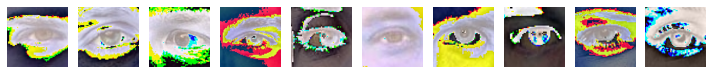

In [6]:
plot_processed_images(imgs)

In [7]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Activation,Dense,Conv2D,Maxpool2D,Flatten

resnet = tf.keras.applications.resnet50.ResNet50(weights=None)
print(len(resnet.layers))
#resnet.summary()

177


In [8]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Activation,Dense,Flatten

x = resnet.layers[-150].output  (#removing 150 layers from ResNet50)
x2 = Flatten()(x)
output = Dense(units=2,activation='sigmoid')(x2)
model = Model(inputs=resnet.inputs,outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
labels.shape

(20, 2)

In [11]:
history = model.fit(train_batches,epochs=5)

Epoch 1/5
375/375 [==============================] - 567s 2s/step - loss: 1.9009 - accuracy: 0.8027
Epoch 2/5
375/375 [==============================] - 566s 2s/step - loss: 1.1844 - accuracy: 0.8851
Epoch 3/5
375/375 [==============================] - 555s 1s/step - loss: 0.8484 - accuracy: 0.9139
Epoch 4/5
375/375 [==============================] - 545s 1s/step - loss: 0.5780 - accuracy: 0.9415
Epoch 5/5
375/375 [==============================] - 574s 2s/step - loss: 0.3594 - accuracy: 0.9644


In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [20]:
model.save("C:/Users/Com/Downloads/Compressed/Eyes Data Set/tensorEye.h5")

C:\Users\Com\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


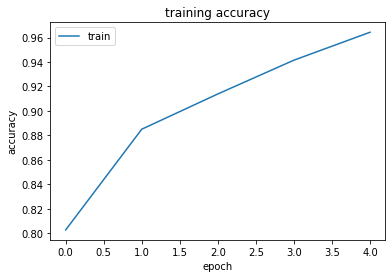

In [21]:
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

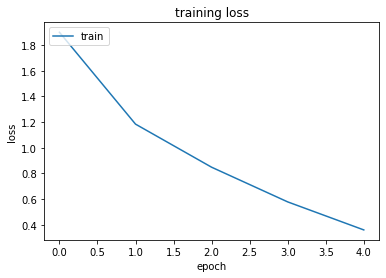

In [22]:
plt.plot(history.history['loss'])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
history2 = model.fit(val_batches,epochs=5)

Epoch 1/5
58/58 [==============================] - 90s 2s/step - loss: 2.7495 - accuracy: 0.8160
Epoch 2/5
58/58 [==============================] - 87s 2s/step - loss: 0.8847 - accuracy: 0.9253
Epoch 3/5
58/58 [==============================] - 85s 1s/step - loss: 0.4434 - accuracy: 0.9592
Epoch 4/5
58/58 [==============================] - 85s 1s/step - loss: 0.2295 - accuracy: 0.9809
Epoch 5/5
58/58 [==============================] - 85s 1s/step - loss: 0.0457 - accuracy: 0.9957


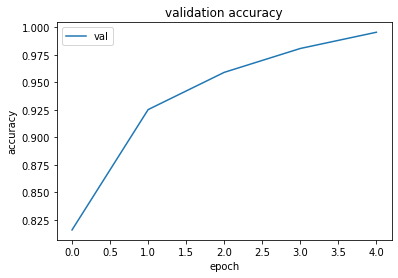

In [16]:
plt.plot(history2.history['accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val'], loc='upper left')
plt.show()

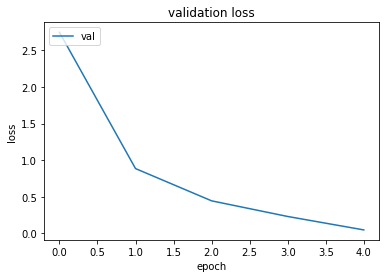

In [17]:
plt.plot(history2.history['loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val'], loc='upper left')

In [19]:
history3 = model.fit(test_batches,epochs=5)

Epoch 1/5
145/145 [==============================] - 214s 1s/step - loss: 0.6031 - accuracy: 0.9472
Epoch 2/5
145/145 [==============================] - 215s 1s/step - loss: 0.2865 - accuracy: 0.9767
Epoch 3/5
145/145 [==============================] - 217s 1s/step - loss: 0.2197 - accuracy: 0.9781
Epoch 4/5
145/145 [==============================] - 213s 1s/step - loss: 0.1978 - accuracy: 0.9868
Epoch 5/5
145/145 [==============================] - 210s 1s/step - loss: 0.1287 - accuracy: 0.9899


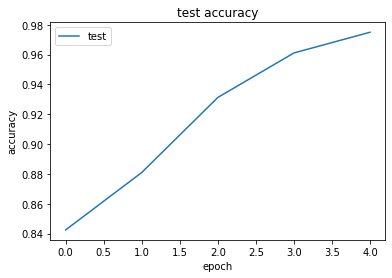

In [34]:
plt.plot(history3.history['accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

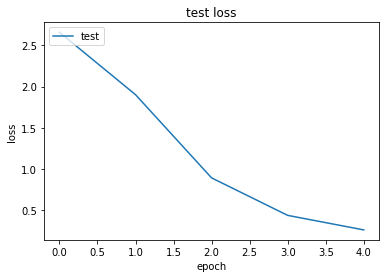

In [35]:
plt.plot(history3.history['loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')

# Using Scikit learn models...

In [2]:
from skimage.io import imread
from skimage.transform import resize
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import pickle

In [3]:
# Making data set suitable to Scikit learn
# First make data frame for female eye images dataset

target_class_female = []
female_images = []
flat_data = []

data_path_0 = "C:/Users/Com/Downloads/Compressed/Eyes Data Set/femaleeyes"

for img in os.listdir(data_path_0):
    img_arr = imread(os.path.join(data_path_0,img))
    img_resized = resize(img_arr,(50,50,3))
    flat_data.append(img_resized.flatten())
    target_class_female.append(0)

flat_data = np.array(flat_data)
target_class = np.array(target_class_female)

df_female = pd.DataFrame(flat_data)
df_female['Class'] = target_class_female
print(df_female.shape)

(5202, 7501)


In [4]:
df_female.head(10)

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,Class
0,0.247148,0.149227,0.062717,0.249016,0.153840,0.058664,0.291896,0.182484,0.074214,0.404172,...,0.971978,0.741194,0.669429,0.975689,0.744317,0.673943,0.949829,0.718456,0.655255,0
1,0.850824,0.615529,0.470431,0.883882,0.650941,0.505843,0.880784,0.653333,0.508039,0.877412,...,0.999804,0.887843,0.786275,0.979843,0.851216,0.744392,0.965373,0.828510,0.719098,0
2,0.095882,0.056666,0.052744,0.093036,0.054644,0.052369,0.139124,0.103829,0.107751,0.165384,...,0.564371,0.505547,0.483743,0.550565,0.491742,0.472683,0.545353,0.486530,0.466960,0
3,0.907156,0.860097,0.875784,0.934016,0.880604,0.898408,0.920220,0.871984,0.888063,0.929620,...,0.905812,0.843067,0.846988,0.903697,0.840952,0.844874,0.901961,0.839216,0.843137,0
4,0.664471,0.451529,0.342314,0.668431,0.452490,0.348304,0.681667,0.461618,0.362696,0.673961,...,0.839314,0.617696,0.529706,0.827706,0.605422,0.520314,0.824206,0.597755,0.509980,0
5,0.670867,0.474083,0.446839,0.746027,0.545840,0.518196,0.778588,0.562761,0.535169,0.802152,...,0.966196,0.804071,0.819757,0.937092,0.779481,0.785520,0.926168,0.772991,0.776913,0
6,0.774651,0.590337,0.566808,0.689802,0.504783,0.482665,0.715655,0.527631,0.511875,0.701677,...,0.856220,0.683459,0.640392,0.855095,0.681967,0.639023,0.851009,0.678417,0.635294,0
7,0.757126,0.619871,0.545362,0.762582,0.622588,0.549448,0.778180,0.625569,0.558737,0.806861,...,0.889631,0.666102,0.623106,0.894461,0.667716,0.621556,0.892714,0.665263,0.618218,0
8,0.945315,0.796295,0.761001,0.940194,0.791174,0.755880,0.944104,0.795084,0.759790,0.961944,...,0.906980,0.720296,0.644610,0.896747,0.708787,0.630355,0.887609,0.699648,0.621216,0
9,0.430665,0.257018,0.159528,0.459682,0.283202,0.187128,0.496941,0.316549,0.222431,0.508996,...,0.709804,0.497710,0.395914,0.705255,0.483931,0.386750,0.686515,0.459064,0.364946,0


In [5]:
# Then make data frame for male eye images dataset

target_class_male = []
male_images = []
flat_data = []

data_path_1 = "C:/Users/Com/Downloads/Compressed/Eyes Data Set/maleeyes"

for img in os.listdir(data_path_1):
    img_arr = imread(os.path.join(data_path_1,img))
    img_resized = resize(img_arr,(50,50,3))
    flat_data.append(img_resized.flatten())
    target_class_male.append(1)

flat_data = np.array(flat_data)
target_class = np.array(target_class_male)

df_male = pd.DataFrame(flat_data)
df_male['Class'] = target_class_male
print(df_male.shape)

(6323, 7501)


In [6]:
df_male.head(10)

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,Class
0,0.929633,0.949241,0.972770,0.926925,0.943131,0.968030,0.937992,0.939804,0.967624,0.959788,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
1,0.740780,0.419522,0.333092,0.722524,0.408337,0.318372,0.703263,0.396667,0.317059,0.691272,...,0.657467,0.295506,0.199569,0.645763,0.272744,0.194547,0.621085,0.240850,0.166262,1
2,0.832725,0.569980,0.354294,0.835549,0.572804,0.357118,0.841814,0.570245,0.363382,0.838882,...,0.981176,0.725833,0.563137,0.985853,0.728657,0.572490,0.995108,0.728814,0.575314,1
3,0.925334,0.803765,0.792001,0.914115,0.792547,0.780782,0.936080,0.803335,0.795296,0.940829,...,0.850590,0.693727,0.654590,0.846203,0.689343,0.650202,0.823841,0.667056,0.627802,1
4,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.768627,0.768627,0.768627,0.780392,0.780392,0.780392,0.788235,0.788235,0.788235,1
5,0.947647,0.677059,0.618235,0.960348,0.687289,0.628466,0.929222,0.646869,0.588045,0.908022,...,0.904980,0.644884,0.566257,0.903174,0.640429,0.565919,0.921039,0.658294,0.583784,1
6,0.806071,0.504110,0.425679,0.815742,0.513782,0.435350,0.822696,0.520735,0.442304,0.831764,...,0.810147,0.490735,0.429363,0.812499,0.494852,0.428185,0.808906,0.484122,0.421024,1
7,0.976205,0.772283,0.721303,0.968327,0.754503,0.707569,0.979218,0.755800,0.712625,0.974128,...,0.977865,0.793159,0.682963,0.964614,0.773098,0.655451,0.973381,0.783922,0.659318,1
8,0.609089,0.487521,0.409090,0.634067,0.518380,0.445829,0.628197,0.516434,0.446826,0.662760,...,0.871812,0.755884,0.763723,0.937736,0.819107,0.817147,0.958328,0.827941,0.820099,1
9,0.901069,0.701049,0.634373,0.891098,0.687824,0.620990,0.881029,0.661373,0.594608,0.864451,...,0.943284,0.714853,0.658971,0.953784,0.721912,0.660510,0.967039,0.724275,0.665265,1


In [7]:
merger = [df_female,df_male]
df = pd.concat(merger)
print(df.shape)

(11525, 7501)


In [8]:
df.head(10)
#df.to_csv('C:/Users/Com/Downloads/Compressed/Eyes Data Set/EyesClassification.csv')

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,Class
0,0.247148,0.149227,0.062717,0.249016,0.153840,0.058664,0.291896,0.182484,0.074214,0.404172,...,0.971978,0.741194,0.669429,0.975689,0.744317,0.673943,0.949829,0.718456,0.655255,0
1,0.850824,0.615529,0.470431,0.883882,0.650941,0.505843,0.880784,0.653333,0.508039,0.877412,...,0.999804,0.887843,0.786275,0.979843,0.851216,0.744392,0.965373,0.828510,0.719098,0
2,0.095882,0.056666,0.052744,0.093036,0.054644,0.052369,0.139124,0.103829,0.107751,0.165384,...,0.564371,0.505547,0.483743,0.550565,0.491742,0.472683,0.545353,0.486530,0.466960,0
3,0.907156,0.860097,0.875784,0.934016,0.880604,0.898408,0.920220,0.871984,0.888063,0.929620,...,0.905812,0.843067,0.846988,0.903697,0.840952,0.844874,0.901961,0.839216,0.843137,0
4,0.664471,0.451529,0.342314,0.668431,0.452490,0.348304,0.681667,0.461618,0.362696,0.673961,...,0.839314,0.617696,0.529706,0.827706,0.605422,0.520314,0.824206,0.597755,0.509980,0
5,0.670867,0.474083,0.446839,0.746027,0.545840,0.518196,0.778588,0.562761,0.535169,0.802152,...,0.966196,0.804071,0.819757,0.937092,0.779481,0.785520,0.926168,0.772991,0.776913,0
6,0.774651,0.590337,0.566808,0.689802,0.504783,0.482665,0.715655,0.527631,0.511875,0.701677,...,0.856220,0.683459,0.640392,0.855095,0.681967,0.639023,0.851009,0.678417,0.635294,0
7,0.757126,0.619871,0.545362,0.762582,0.622588,0.549448,0.778180,0.625569,0.558737,0.806861,...,0.889631,0.666102,0.623106,0.894461,0.667716,0.621556,0.892714,0.665263,0.618218,0
8,0.945315,0.796295,0.761001,0.940194,0.791174,0.755880,0.944104,0.795084,0.759790,0.961944,...,0.906980,0.720296,0.644610,0.896747,0.708787,0.630355,0.887609,0.699648,0.621216,0
9,0.430665,0.257018,0.159528,0.459682,0.283202,0.187128,0.496941,0.316549,0.222431,0.508996,...,0.709804,0.497710,0.395914,0.705255,0.483931,0.386750,0.686515,0.459064,0.364946,0


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [10]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
6318,1
6319,1
6320,1
6321,1


In [12]:
#Shuffle Dataset
#df_new =df.sample(frac=1)
#df_new.head(10)

In [11]:
from sklearn.model_selection import train_test_split,cross_validate

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.265, shuffle=True)

In [34]:
print(X_train.shape , type(X_train))

(8470, 7500) <class 'pandas.core.frame.DataFrame'>


In [35]:
# to remove warning convert y_train dataframe to numpy array
y_train = y_train.to_numpy().ravel()

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

#gnb = GaussianNB()
#gnb.fit(X_train,y_train)

# Logistic Regression model
clf = SGDClassifier(loss='log_loss')
clf.fit(X_train,y_train)

SGDClassifier(loss='log_loss')

In [37]:
train_predict = clf.predict(X_train)

In [39]:
#Train Accuracy
accuracy_score(y_train,train_predict)

0.8345926800472255

In [43]:
clf.coef_

array([[2.84164358, 2.78982898, 3.84490618, ..., 0.98155683, 0.40462815,
        0.77945174]])

In [41]:
predicted = clf.predict(X_test)

In [42]:
# Test Accuracy
accuracy_score(y_test,predicted)

0.806873977086743

In [54]:
report = classification_report(y_test, predicted)

In [55]:
report

'              precision    recall  f1-score   support\n\n           0       0.81      0.87      0.84      1406\n           1       0.88      0.82      0.85      1649\n\n    accuracy                           0.84      3055\n   macro avg       0.84      0.85      0.84      3055\nweighted avg       0.85      0.84      0.84      3055\n'

Confusion matrix:
[[1222  184]
 [ 295 1354]]


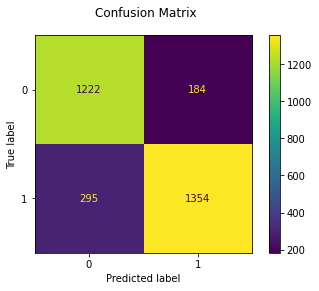

In [56]:
#additional
#metrics.classification_report(y_test, predicted)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [57]:
pickle.dump(clf, open("C:/Users/Com/Downloads/Compressed/Eyes Data Set/logisticmodel", 'wb'))